In [1]:
import pandas 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn import preprocessing

accidents = pandas.read_csv("./Accidents_2016.csv")
cas = pandas.read_csv("./Cas.csv")

/home/ubuntu/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


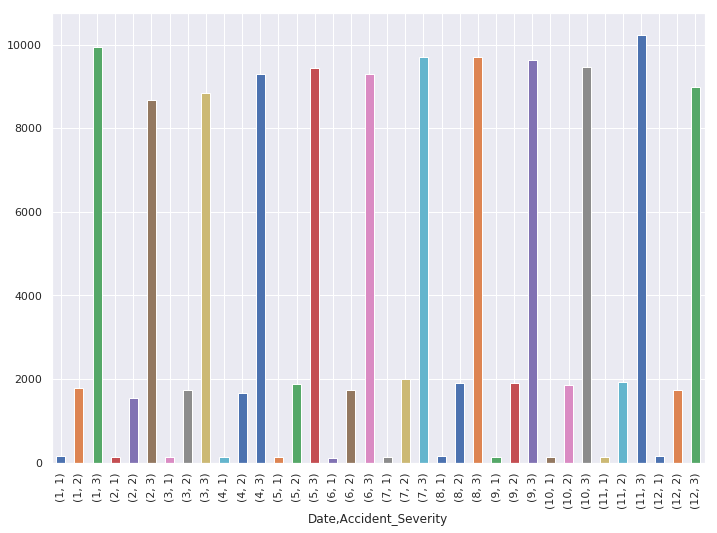

In [7]:
accidents["Date"] = pandas.to_datetime(accidents["Date"]) 
accidents.groupby([accidents["Date"].dt.month,accidents['Accident_Severity']]).size().plot(kind='bar')

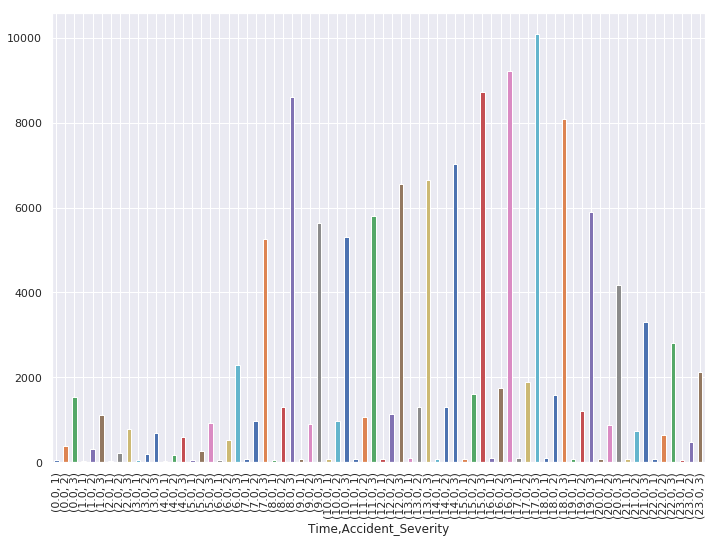

In [8]:
accidents["Time"] = pandas.to_datetime(accidents["Time"])
accidents.groupby([accidents["Time"].dt.hour,accidents['Accident_Severity']]).size().plot(kind='bar')

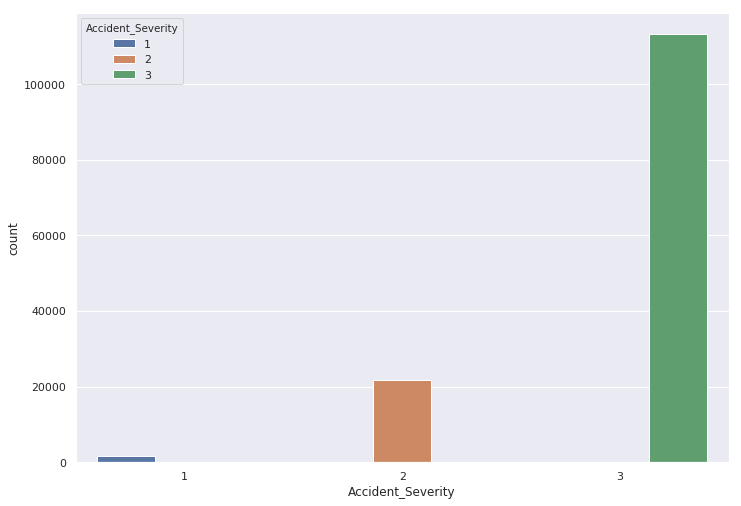

In [9]:
sns.set(style='whitegrid',color_codes=True)
sns.set(rc = {'figure.figsize':(11.7,8.27)})
sns.countplot(x='Accident_Severity',data = accidents,hue = 'Accident_Severity') 

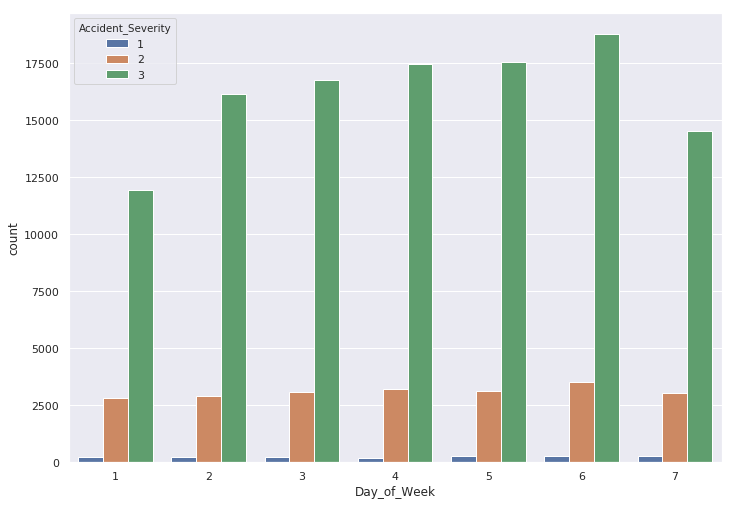

In [10]:
sns.countplot(x='Day_of_Week',data = accidents,hue = 'Accident_Severity') 

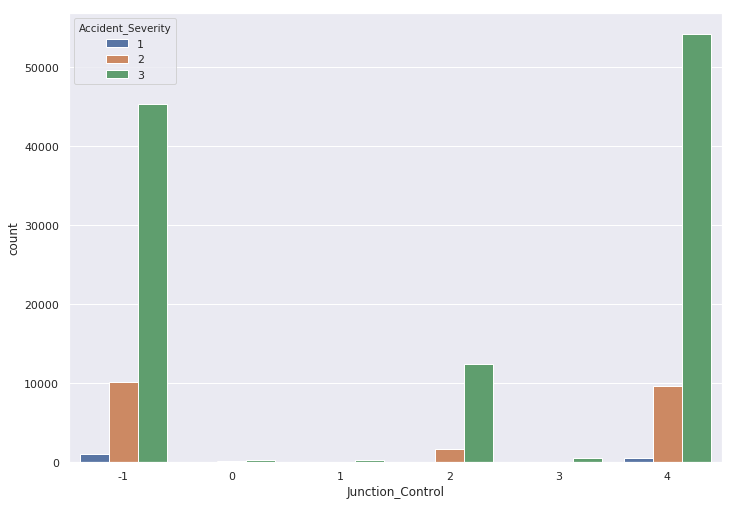

In [11]:
sns.countplot(x='Junction_Control',data = accidents,hue = 'Accident_Severity') 

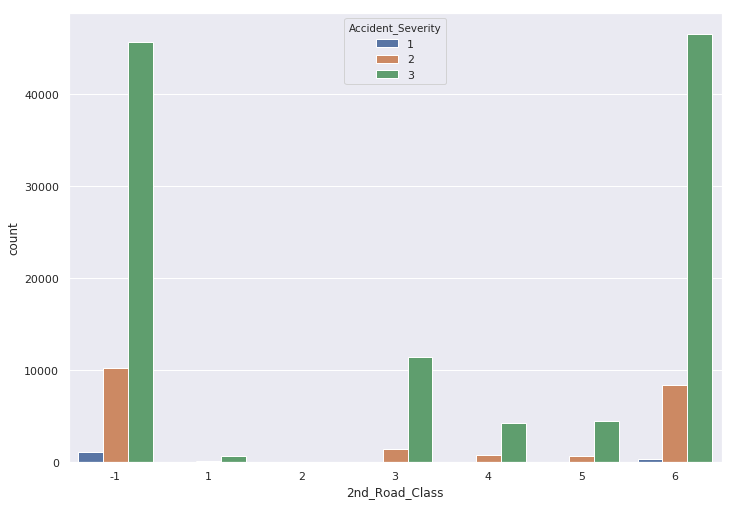

In [12]:
sns.countplot(x='2nd_Road_Class',data = accidents,hue = 'Accident_Severity')

In [6]:
acc_m = pandas.read_csv("./dfacc_sele.csv")
cas_m = pandas.read_csv("./dfcas_sele.csv")

acciSub = acc_m[['Accident_Index','Longitude','Latitude','Police_Force', 'Accident_Severity', 'Number_of_Vehicles', 
                     'Number_of_Casualties', 'Date', 'Day_of_Week', 'Time', '1st_Road_Class', 'Road_Type', 'Speed_limit', 
                     'Junction_Detail', 'Pedestrian_Crossing-Human_Control', 'Pedestrian_Crossing-Physical_Facilities', 
                     'Light_Conditions', 'Weather_Conditions', 'Road_Surface_Conditions', 'Special_Conditions_at_Site', 
                     'Carriageway_Hazards', 'Urban_or_Rural_Area']]

casSub = cas_m[['Accident_Index', 'Vehicle_Reference','Casualty_Class', 'Sex_of_Casualty', 'Age_of_Casualty',
              'Pedestrian_Location','Pedestrian_Movement', 'Car_Passenger', 'Bus_or_Coach_Passenger', 'Casualty_Type',]]

merged = acciSub.merge(casSub, on='Accident_Index', how="inner")

le = preprocessing.LabelEncoder()
encoded_value = le.fit_transform([])

merged['Accident_Severity'] = le.fit_transform(merged['Accident_Severity'])
merged['1st_Road_Class'] = le.fit_transform(merged['1st_Road_Class'])
merged['Road_Type'] = le.fit_transform(merged['Road_Type'])
merged['Pedestrian_Crossing-Human_Control'] = le.fit_transform(merged['Pedestrian_Crossing-Human_Control'])
merged['Pedestrian_Crossing-Physical_Facilities'] = le.fit_transform(merged['Pedestrian_Crossing-Physical_Facilities'])
merged['Light_Conditions'] = le.fit_transform(merged['Light_Conditions'])
merged['Weather_Conditions'] = le.fit_transform(merged['Weather_Conditions'])
merged['Road_Surface_Conditions'] = le.fit_transform(merged['Road_Surface_Conditions'])
merged['Special_Conditions_at_Site'] = le.fit_transform(merged['Special_Conditions_at_Site'])
merged['Carriageway_Hazards'] = le.fit_transform(merged['Carriageway_Hazards'])
merged['Urban_or_Rural_Area'] = le.fit_transform(merged['Urban_or_Rural_Area'])
merged['Vehicle_Reference'] = le.fit_transform(merged['Vehicle_Reference'])
merged['Casualty_Class'] = le.fit_transform(merged['Casualty_Class'])
merged['Sex_of_Casualty'] = le.fit_transform(merged['Sex_of_Casualty'])
merged['Pedestrian_Location'] = le.fit_transform(merged['Pedestrian_Location'])
merged['Pedestrian_Movement'] = le.fit_transform(merged['Pedestrian_Movement'])
merged['Car_Passenger'] = le.fit_transform(merged['Car_Passenger'])
merged['Bus_or_Coach_Passenger'] = le.fit_transform(merged['Bus_or_Coach_Passenger'])
merged['Casualty_Type'] = le.fit_transform(merged['Casualty_Type'])

merged['Age_of_Casualty'].replace(-1,0).describe()
merged['Junction_Detail'].replace(-1,0).describe()
merged['Speed_limit'].describe()
merged['Day_of_Week'].describe()
merged['Number_of_Vehicles'].describe()
merged['Number_of_Casualties'].describe()
merged['Police_Force'].describe()
merged['Day_of_Week'].describe()


print(merged.corr()['Accident_Severity'].abs())
kk = merged.corr()['Accident_Severity'].abs().sort_values(kind='quicksort')
print(kk)

merged=merged.drop(columns=['Time','Date','Accident_Index',
                            'Day_of_Week','Pedestrian_Crossing-Human_Control','Carriageway_Hazards',
                            '1st_Road_Class'])
print(merged.columns)

merged.to_csv('./dm1.csv',index=False)

Longitude                                  0.046980
Latitude                                   0.042752
Police_Force                               0.075275
Accident_Severity                          1.000000
Number_of_Vehicles                         0.037847
Number_of_Casualties                       0.117553
Day_of_Week                                0.004022
1st_Road_Class                             0.018382
Road_Type                                  0.042055
Speed_limit                                0.122967
Junction_Detail                            0.060024
Pedestrian_Crossing-Human_Control          0.005667
Pedestrian_Crossing-Physical_Facilities    0.037066
Light_Conditions                           0.073425
Weather_Conditions                         0.013069
Road_Surface_Conditions                    0.017345
Special_Conditions_at_Site                 0.008979
Carriageway_Hazards                        0.006717
Urban_or_Rural_Area                        0.129718
Vehicle_Refe